In [8]:
#Import all of the libraries that is needed here.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

In [9]:
# Loading the Iris dataset from sklearn
iris = datasets.load_iris()

# Create Dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

#Create and set the target as the species column
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

# Display the species column
print(df['species'])

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64


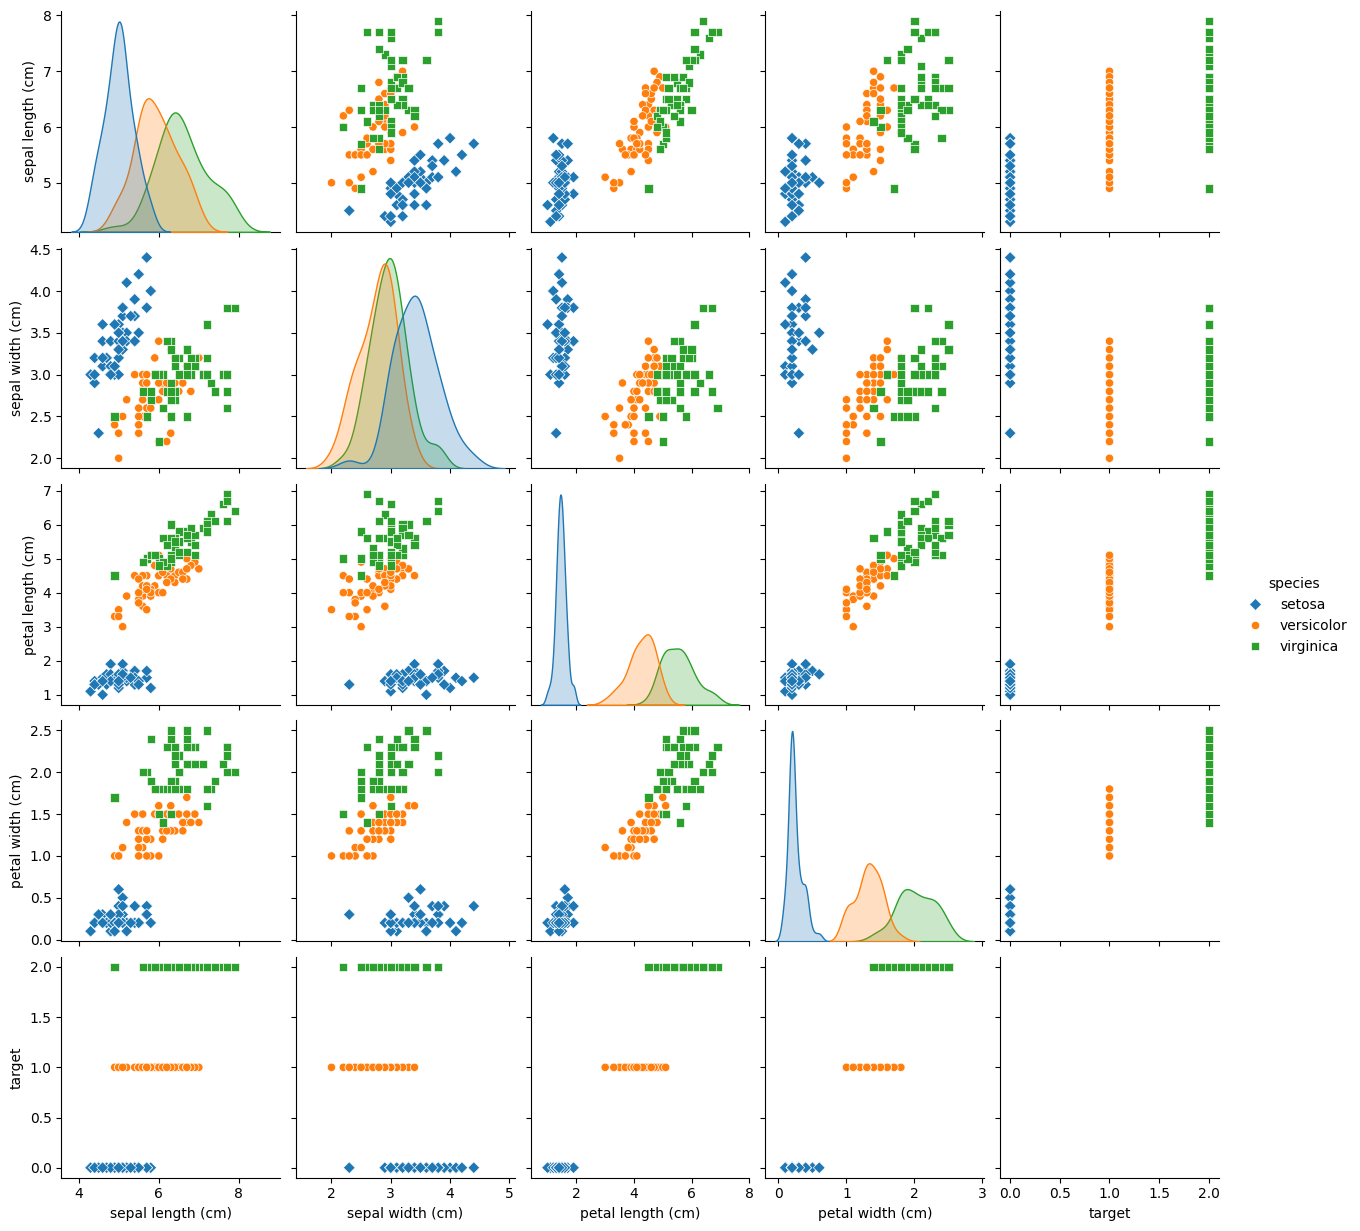

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [10]:
#Check for missing values in the dataset
print(df.isnull().sum())

#Create a pairplot based on the species of the dataset where o is circle, s is square and D is diamond
sns.pairplot(df, hue='species', markers=["D", "o", "s"])
plt.show()

#Summary of the plot
print(df.describe())

In [11]:
#Extracting all of the column expect the last 2 columns
X = df.iloc[:, :-2].values

#Extracting the species coloumn
y = df['species'].values

#This is a sklearn function which removes the mean and scale the data using varience for standardization 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
#Spliting the dataset to 80% training data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training data: {X_train.shape[0]}")
print(f"Testing data: {X_test.shape[0]}")


Training data: 120
Testing data: 30


In [13]:
#Sepal features (Sepal Length and Sepal Width)
X_sepal = X_scaled[:, :2]

#Petal features (Petal Length and Petal Width)
X_petal = X_scaled[:, 2:]

In [14]:
#Initialize KNN with k=11
k = 11
knn = KNeighborsClassifier(n_neighbors=k)

#Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [15]:
#Make predictions
y_pred = knn.predict(X_test)

#Create a confusion Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
Accuracy: 96.67%


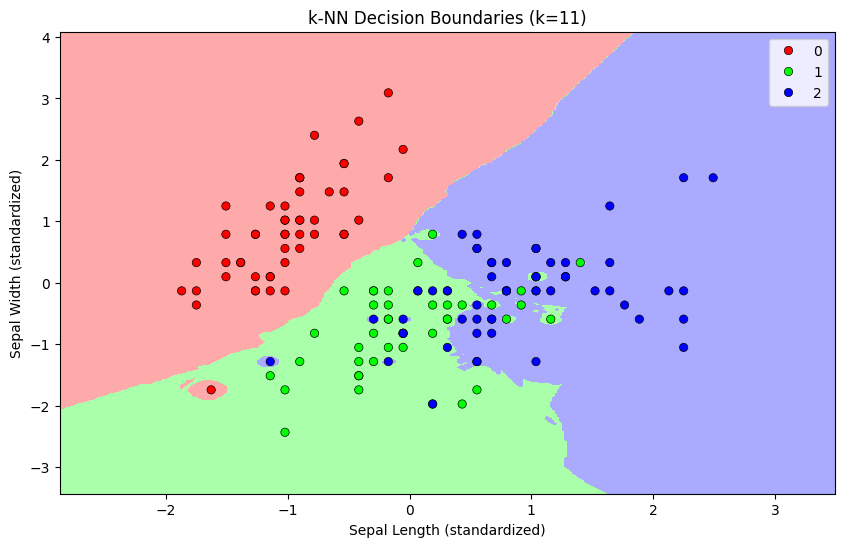

In [16]:
#Extract the species into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

def plot_decision_boundaries(X, y, classifier, title):
    #Size of the mesh (small)
    h = 0.02

    #Minimum and maximum of x and y
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    #Create a grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    #Using classifier to do the prediction
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.asarray(Z, dtype=np.float32)  # Ensure numeric format
    Z = Z.reshape(xx.shape)

    #Set the colour of plot (Red, Green, Blue)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    #Fill the background with the colours
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    #Overlay the data points with sccatterplot
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold.colors, edgecolor='k')

    #Title and labels for x and y axis
    plt.xlabel('Sepal Length (standardized)')
    plt.ylabel('Sepal Width (standardized)')
    plt.title(title)
    plt.show()

#Split the dataset into 80% training data and 20% testing data using only the sepal width and length
X_train_sepal, X_test_sepal, y_train_sepal, y_test_sepal = train_test_split(
    X_sepal, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

#Using the k above, train the data using the distance as the weigh
knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
knn.fit(X_train_sepal, y_train_sepal)

#Plot the graph of the KNN
plot_decision_boundaries(X_sepal, y_encoded, knn, f'k-NN Decision Boundaries (k={k})')

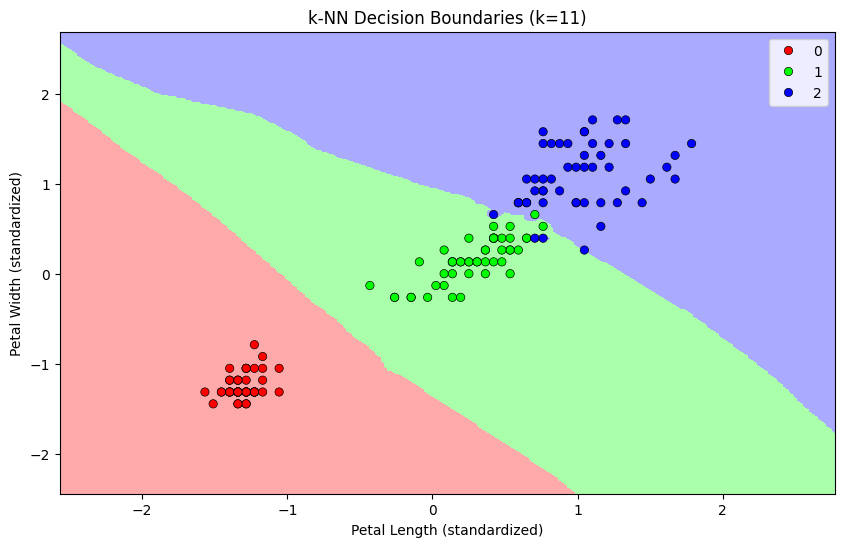

In [17]:
#Extract the species into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

def plot_decision_boundaries(X, y, classifier, title):
    #Size of the mesh (small)
    h = 0.02

    #Minimum and maximum of x and y
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    #Create a grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    #Using classifier to do the prediction
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.asarray(Z, dtype=np.float32)  # Ensure numeric format
    Z = Z.reshape(xx.shape)

    #Set the colour of plot (Red, Green, Blue)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    #Fill the background with the colours
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    #Overlay the data points with sccatterplot
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold.colors, edgecolor='k')

    #Title and labels for x and y axis
    plt.xlabel('Petal Length (standardized)')
    plt.ylabel('Petal Width (standardized)')
    plt.title(title)
    plt.show()

#Split the dataset into 80% training data and 20% testing data using only the petal width and length
X_train_petal, X_test_petal, y_train_petal, y_test_petal = train_test_split(
    X_petal, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

#Using the k above, train the data using the distance as the weigh
knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
knn.fit(X_train_petal, y_train_petal)

#Plot the graph of the KNN
plot_decision_boundaries(X_petal, y_encoded, knn, f'k-NN Decision Boundaries (k={k})')

In [18]:
#Make predictions
y_pred = knn.predict(X_test_sepal)

#Create a confusion Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test_sepal, y_pred))

print(f"Accuracy: {accuracy_score(y_test_sepal, y_pred) * 100:.2f}%")

Confusion Matrix:
[[2 5 3]
 [3 7 0]
 [0 8 2]]
Accuracy: 36.67%


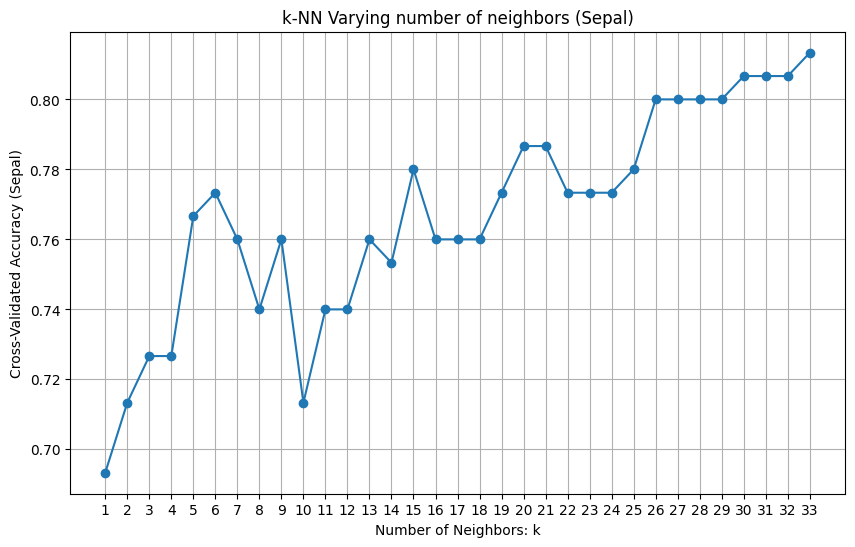

The optimal number of K for Sepal length and width is 33 with a cross-validated accuracy of 81.33%.


In [19]:
#Setting the k values from 1 to 33
k_values = range(1, 34)
cv_scores_sepal = []

#Looping through all of the K-values to see the accuracy of each K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_sepal, y_encoded, cv=10, scoring='accuracy')
    cv_scores_sepal.append(scores.mean())

#Plotting the results for Sepal length and width
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores_sepal, marker='o')
plt.xlabel('Number of Neighbors: k')
plt.ylabel('Cross-Validated Accuracy (Sepal)')
plt.title('k-NN Varying number of neighbors (Sepal)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#Best k for Sepal length and width
best_k_sepal = k_values[np.argmax(cv_scores_sepal)]
print(f"The optimal number of K for Sepal length and width is {best_k_sepal} with a cross-validated accuracy of {max(cv_scores_sepal)*100:.2f}%.")

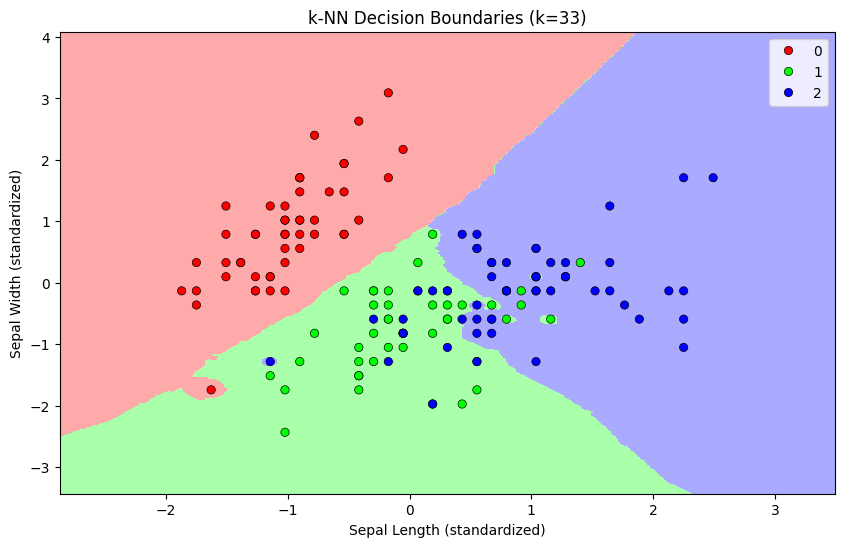

In [20]:
#Extract the species into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

def plot_decision_boundaries(X, y, classifier, title):
    #Size of the mesh (small)
    h = 0.02

    #Minimum and maximum of x and y
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    #Create a grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    #Using classifier to do the prediction
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.asarray(Z, dtype=np.float32)  # Ensure numeric format
    Z = Z.reshape(xx.shape)

    #Set the colour of plot (Red, Green, Blue)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    #Fill the background with the colours
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    #Overlay the data points with sccatterplot
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold.colors, edgecolor='k')

    #Title and labels for x and y axis
    plt.xlabel('Sepal Length (standardized)')
    plt.ylabel('Sepal Width (standardized)')
    plt.title(title)
    plt.show()

#Split the dataset into 80% training data and 20% testing data using only the sepal width and length
X_train_sepal, X_test_sepal, y_train_sepal, y_test_sepal = train_test_split(
    X_sepal, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

#Using the k above, train the data using the distance as the weigh
optimal_k_sepal= k_values[np.argmax(cv_scores_sepal)]
knn = KNeighborsClassifier(n_neighbors=optimal_k_sepal, weights='distance')
knn.fit(X_train_sepal, y_train_sepal)

#Plot the graph of the KNN
plot_decision_boundaries(X_sepal, y_encoded, knn, f'k-NN Decision Boundaries (k={optimal_k_sepal})')

In [21]:
#Make predictions
y_pred = knn.predict(X_test_sepal)

#Create a confusion Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test_sepal, y_pred))

print(f"Accuracy: {accuracy_score(y_test_sepal, y_pred) * 100:.2f}%")

Confusion Matrix:
[[10  0  0]
 [ 0  5  5]
 [ 0  5  5]]
Accuracy: 66.67%


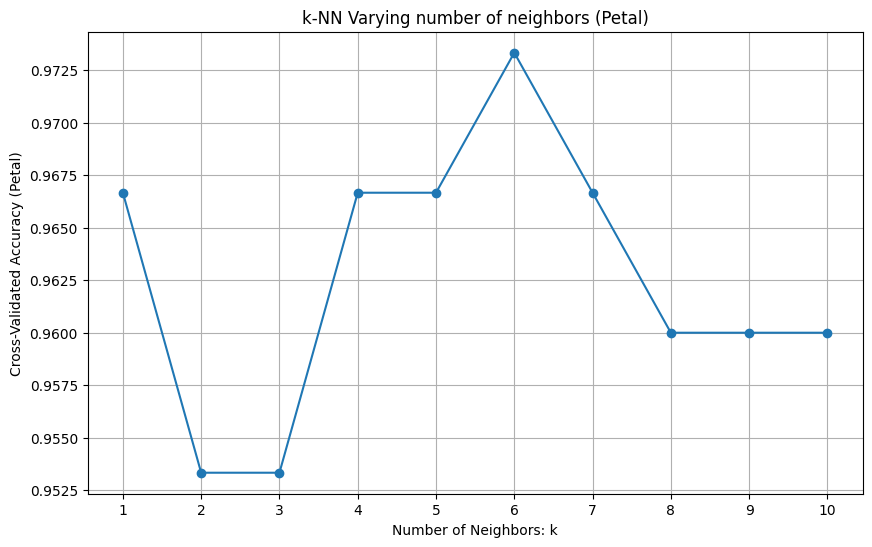

The optimal number of K for Petal length and width is 6 with a cross-validated accuracy of 97.33%.


In [22]:
#Setting the k values from 1 to 10
k_values = range(1, 11)
cv_scores_petal = []

#Looping through all of the K-values to see the accuracy of each K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_petal, y_encoded, cv=10, scoring='accuracy')
    cv_scores_petal.append(scores.mean())

#Plotting the results for Petal length and width
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores_petal, marker='o')
plt.xlabel('Number of Neighbors: k')
plt.ylabel('Cross-Validated Accuracy (Petal)')
plt.title('k-NN Varying number of neighbors (Petal)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#Best k for Petal length and width
best_k_petal = k_values[np.argmax(cv_scores_petal)]
print(f"The optimal number of K for Petal length and width is {best_k_petal} with a cross-validated accuracy of {max(cv_scores_petal)*100:.2f}%.")

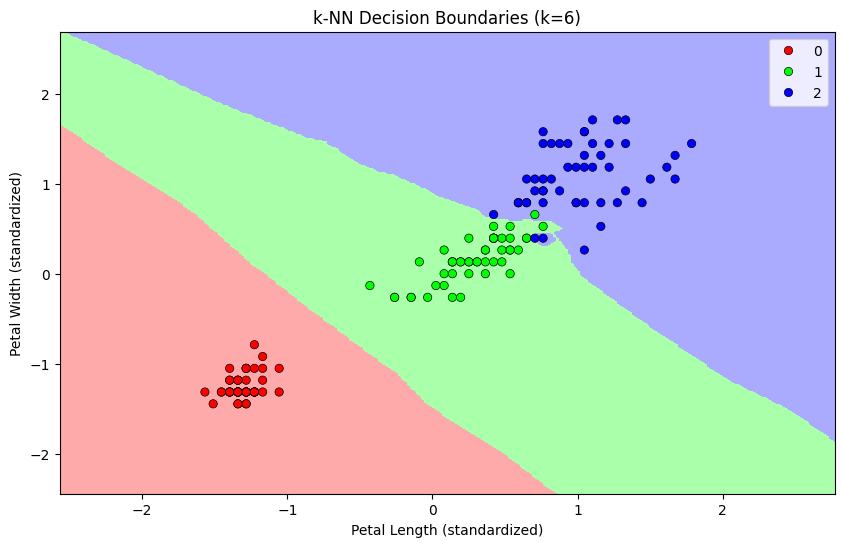

In [23]:
#Extract the species into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

def plot_decision_boundaries(X, y, classifier, title):
    #Size of the mesh (small)
    h = 0.02

    #Minimum and maximum of x and y
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    #Create a grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    #Using classifier to do the prediction
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.asarray(Z, dtype=np.float32)  # Ensure numeric format
    Z = Z.reshape(xx.shape)

    #Set the colour of plot (Red, Green, Blue)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    #Fill the background with the colours
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    #Overlay the data points with sccatterplot
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold.colors, edgecolor='k')

    #Title and labels for x and y axis
    plt.xlabel('Petal Length (standardized)')
    plt.ylabel('Petal Width (standardized)')
    plt.title(title)
    plt.show()

#Split the dataset into 80% training data and 20% testing data using only the petal width and length
X_train_petal, X_test_petal, y_train_petal, y_test_petal = train_test_split(
    X_petal, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

#Using the k above, train the data using the distance as the weigh
optimal_k_petal= k_values[np.argmax(cv_scores_petal)]
knn = KNeighborsClassifier(n_neighbors=optimal_k_petal, weights='distance')
knn.fit(X_train_petal, y_train_petal)

#Plot the graph of the KNN
plot_decision_boundaries(X_petal, y_encoded, knn, f'k-NN Decision Boundaries (k={optimal_k_petal})')

In [24]:
#Assign the training data and the encoded species
X_train = X_scaled  
y_train = y_encoded

#Set K to be 5
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

#Fit the model to the training data
knn.fit(X_train, y_train)

#Sample of attributes
new_sample = [[7.0,3.2,4.7,1.4]]

#Scale the new data for standardization
new_sample_scaled = scaler.transform(new_sample)

#Predicting the species according to the data
predicted_class = knn.predict(new_sample_scaled)
predicted_species = label_encoder.inverse_transform(predicted_class)
print(f"Predicted species: {predicted_species[0]}")

Predicted species: versicolor


In [25]:
#Only using the petal length and width to predict the species
X_train_petal = X[:, 2:]

# Fit the scaler on the two features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_petal)

# Initialize and train the KNN model with the two features
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

#Sample of attributes
new_sample = [[4.7, 1.4]]

#Scale the new data for standardization
new_sample_scaled = scaler.transform(new_sample)

#Predicting the species according to the data
predicted_class = knn.predict(new_sample_scaled)
predicted_species = label_encoder.inverse_transform(predicted_class)
print(f"Predicted species: {predicted_species[0]}")

Predicted species: versicolor


In [26]:
#Only using the sepal length and width to predict the species
X_train_sepal = X[:, :2]

# Fit the scaler on the two features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_petal)

# Initialize and train the KNN model with the two features
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

#Sample of attributes
new_sample = [[7.0,3.2]]

#Scale the new data for standardization
new_sample_scaled = scaler.transform(new_sample)

#Predicting the species according to the data
predicted_class = knn.predict(new_sample_scaled)
predicted_species = label_encoder.inverse_transform(predicted_class)
print(f"Predicted species: {predicted_species[0]}")

Predicted species: virginica
